<a href="https://colab.research.google.com/github/HaJeong-K/multi_cam_total/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D_0817.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분류 모형
- 대출을 허락 하냐 안하냐
- 코로나 양성/음성 진단

### 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris                  # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier         # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split    # 훈련 데이터 / 테스트 데이터

iris = load_iris()
iris_data = iris.data  # 독립변수

iris_label = iris.target  # 종속변수

print('iris target', iris_label)
# print('iris data', iris_data)
print('iris target 명', iris.target_names)

iris target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 ['setosa' 'versicolor' 'virginica']


In [3]:
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# 0은 setosa, 1은  versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data,  # 독립변수
    iris_label,  # 종속변수
    test_size = 0.2,
    random_state = 11  # 랜덤으로 나오는 숫자가 고정되도록 함 숫자 크기는 상관없음.
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 모형 학습코드

In [6]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

### 모형 예측

In [7]:
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

### 모형 평가

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9333333333333333


# K 폴드
- 102 페이지

## 데이터 불러오기

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=11)

print('붓꽃 데이터 세트 크기 :', features.shape[0])

붓꽃 데이터 세트 크기 : 150


## KFold 코드

In [10]:
kfold = KFold(n_splits=5)  # 5개의 폴드 데이터 생성
cv_accuracy = []
n_iter = 0

# KFold 객체의 split() 호출하면, 폴드 별, 학습용, 검증용 테스트 Row index 배열로 반환
for train_index, test_index in kfold.split(features):

  #print(train_index, test_index)
  X_train, X_test = features[train_index], features[test_index] # 독립변수
  y_train, y_test = label[train_index], label[test_index] # 종속변수

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

  print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
  print("## 평균 검증 정확도: [0.98 0.92 0.98]")
  print("\n## 평균 검증 정확도", np.mean(cv_accuracy))
  print("## 평균 검증 정확도: 0.96")


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 교차 검증별 정확도: [1.]
## 평균 검증 정확도: [0.98 0.92 0.98]

## 평균 검증 정확도 1.0
## 평균 검증 정확도: 0.96

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 교차 검증별 정확도: [1.     0.9667]
## 평균 검증 정확도: [0.98 0.92 0.98]

## 평균 검증 정확도 0.98335
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 교차 검증별 정확도: [1.     0.9667 0.8667]
## 평균 검증 정확도: [0.98 0.92 0.98]

## 평균 검증 정확도 0.9444666666666667
## 평균 검증 정확도: 0.96

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 교차 검증별 정확도: [1.   

## Stratified K 폴드
- Stratified 의미 파악
- 층화추출에서 유래 > 데이터를 수집할 때, 각 조건의 비율에 맞게 수집하는 것.

- 분류모델에서 Stratified K 폴드 꼭 써야함 > 104 페이지 하단에 이유나옴
  + 범주 예측 (100건 연체, 9900건 정상)
- 훈련데이터 / 테스트 분리
  + 99건 연체 / 6901건 정상
  + 테스트 데이터 1건 연체 / 나머지 정상

In [11]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [12]:
kfold = KFold(n_splits=3)
# 폴드 세트를 3번 반복한다.

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [13]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


## 모형 학습 및 예측 평가
- 108 페이지

In [14]:
dt_clf = DecisionTreeClassifier(random_state=11)
skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
   # print(train_index, test_index)
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]

  # formmat ==> f-string 뱐환
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

  # 교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
  print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.92]
## 평균 검증 정확도: 0.95

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.92 0.98]
## 평균 검증 정확도: 0.96


- cross_val_score()
  + 반복문 코드 줄여줌


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=11)

data = iris_data.data
label = iris_data.target

# 성능 징표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print(np.round(scores))

[1. 1. 1.]


## GridSearchCV
- 190 페이지 참고
- 111~112 페이지

0.6333333333333333


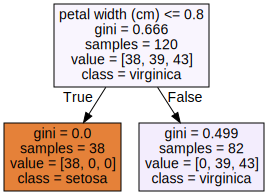

In [16]:
from sklearn.datasets import load_iris               # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier      # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split # 훈련 데이터 / 테스트 데이터
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

iris = load_iris()
iris_data = iris.data  # 독립변수
iris_label = iris.target # 종속변수

# 0은 setosa, 1은 versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data     # 독립변수
    , iris_label # 종속변수
    , test_size=0.2
    , random_state=2023
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1,min_samples_split = 2)

# 학습 수행
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris.target_names,
                feature_names = iris.feature_names, impurity = True, filled = True)
pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred))

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
dt_clf = DecisionTreeClassifier(random_state = 11, max_depth = 2, min_samples_split = 2)

# max_depth = 1, min_samples_split = 2 >> 정확도는 63.3  모형개발 1번
# max_depth = 1, min_samples_split = 3 >> 정확도는 70    모형개발 2번
# max_depth = 2, min_samples_split = 2 >> 정확도는 75    모형개발 3번

# GridSearchCV, RandomSearchCV > 111 페이지
grid_params = {
    'max_depth' : [1, 2, 3, 4, 5, 6],
    'min_samples_split' : [2, 3, 4, 5, 6]
}

# 모형을 30번 만듬 CV가 3이면  곱하기 3
# 최고의 파라미터 조합을 찾는 것
# best parameters 추출 가능
# 최종적인 머신러닝 파라미터

In [20]:
from sklearn.datasets import load_iris                  # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier         # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


- RandomSearch, GridSearch
==> 결론은 RandomSearch 만 사용

# 데이터 전처리
- Feature Engineering
- 매우 중요!!!
